<a href="https://colab.research.google.com/github/MichailSkiadopoulos/-IST-597---ASSIGNMENT-01000/blob/main/MLP_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load Library
import os
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import numpy as np
import pandas as pd
import time
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
from math import sqrt
from google.colab import drive
from scipy.interpolate import CubicSpline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
np.random.seed(2)
tf.random.set_seed(2)

In [ ]:
# Load Drive
drive.mount('/content/drive/')
path = '/content/drive/My Drive/Colab Notebooks/Porosity characterization/'

Mounted at /content/drive/


In [ ]:
# Load Data
time_start = time.time()
filename = 'POROSITY' #Valid options are POROSITY or POROSITY&PORESIZE or POROSITY&PORESIZE&STD

xdf = np.loadtxt('{}data.txt'.format(path, filename)) #Time signals usesd as input to the ML
ydf = np.loadtxt('{}info.txt'.format(path, filename)) #Category Label vector

if filename == 'POROSITY':
  categoryNumber = 3 
elif filename == 'POROSITY&PORESIZE':
  categoryNumber = 12
elif filename == 'POROSITY&PORESIZE&STD':
  categoryNumber = 36

time_taken = time.time() - time_start
print('\nTotal time taken loading data (in seconds): {:.2f}'.format(time_taken))


Total time taken loading data (in seconds): 69.75


In [ ]:
ydf

array([ 0.,  0.,  0., ..., 11., 11., 11.])

In [ ]:
print(xdf.shape[1])

58398


In [ ]:
# Split Data

train_ratio = 0.95

X_train, X_test, y_train, y_test = train_test_split(xdf, ydf, test_size=(1-train_ratio))

In [ ]:
print(y_test.shape[0])

51


In [ ]:
# Print Size
print("X_train Size:" + str(X_train.shape))
print("X_test Size:" + str(X_test.shape))

print("y_train Size:" + str(y_train.shape))
print("y_test Size:" + str(y_test.shape))

X_train Size:(951, 58398)
X_test Size:(51, 58398)
y_train Size:(951,)
y_test Size:(51,)


In [ ]:
# Rescale data 
mmax=np.max(abs(X_train))
X_train=tf.cast(X_train,dtype=tf.float32)
X_test=tf.cast(X_test,dtype=tf.float32)
X_train=X_train/mmax
X_test=X_test/mmax

In [ ]:
# Details of input & output data

print("Training input data range: \nFrom " + str(np.min(X_train)) + " to " + str(np.max(X_train)))
print("Testing input data range: \nFrom " + str(np.min(X_test)) + " to " + str(np.max(X_test)))

print("\nTraining target data: ")
print(set(list(y_train)))

print("\nTesting target data: ")
print(set(list(y_test)))

Training input data range: 
From -0.84432423 to 1.0
Testing input data range: 
From -0.84302443 to 1.0

Training target data: 
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0}

Testing target data: 
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0}


## Build MLP using Eager Execution & custom optimizer

In [ ]:
# define the model
model = Sequential()

initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=0.1)

model.add(Dense(144, kernel_initializer=initializer, bias_initializer='zeros', activation='relu', input_shape=(58398,)))

model.add(Dense(144, kernel_initializer=initializer, bias_initializer='zeros', activation='relu',kernel_regularizer=keras.regularizers.l2(l=0.1)))

model.add(Dense(24, kernel_initializer=initializer, bias_initializer='zeros', activation='relu',kernel_regularizer=keras.regularizers.l2(l=0.1)))

model.add(Dense(categotyNumber, kernel_initializer=initializer, bias_initializer='zeros', activation='softmax'))
# compile the model
opt=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    amsgrad=False,
    name='AdamW')
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

## Train Model:

Epoch 1/50
113/113 [==============================] - 5s 42ms/step - loss: 15.4124 - accuracy: 0.1251 - val_loss: 8.2666 - val_accuracy: 0.1250
Epoch 2/50
113/113 [==============================] - 5s 40ms/step - loss: 5.6615 - accuracy: 0.1440 - val_loss: 4.0801 - val_accuracy: 0.1667
Epoch 3/50
113/113 [==============================] - 4s 40ms/step - loss: 3.3440 - accuracy: 0.1484 - val_loss: 3.0171 - val_accuracy: 0.0833
Epoch 4/50
113/113 [==============================] - 5s 41ms/step - loss: 2.6416 - accuracy: 0.1628 - val_loss: 2.6232 - val_accuracy: 0.0625
Epoch 5/50
113/113 [==============================] - 5s 41ms/step - loss: 2.3936 - accuracy: 0.1794 - val_loss: 2.4381 - val_accuracy: 0.2083
Epoch 6/50
113/113 [==============================] - 5s 41ms/step - loss: 2.2406 - accuracy: 0.1872 - val_loss: 2.3363 - val_accuracy: 0.2292
Epoch 7/50
113/113 [==============================] - 5s 41ms/step - loss: 2.1299 - accuracy: 0.2326 - val_loss: 2.2331 - val_accuracy: 0.145

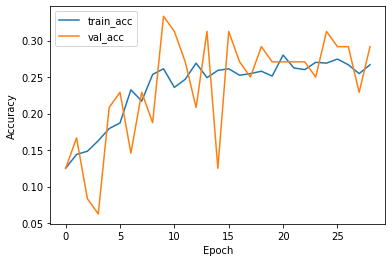

In [ ]:
history=model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split = 0.05, callbacks=[callback], verbose=1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.legend()
plt.show()

## Testing

2/2 [==============================] - 0s 13ms/step


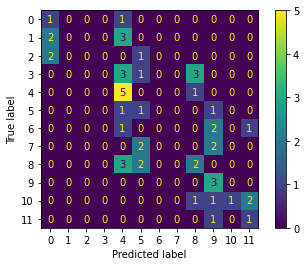

Testing Accuracy: 27.45%


In [ ]:
# Testing
predictions= model.predict(X_test)
predictions=np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Testing Accuracy: %.2f%%" % (accuracy * 100.0))